In [27]:
import numpy as np
from gammaALPs.core import Source, ALP, ModuleList
import matplotlib.pyplot as plt

In [6]:
log10MeV = np.loadtxt('energy_bins.dat')
EGeV = np.power(10, log10MeV - 3.)

In [8]:
ngc1275 = Source(z=0.017559, ra='03h19m48.1s', dec='+41d30m42s')
alp = ALP(1, 1)
pin = 0.5 * np.diag((1., 1., 0))
ml = ModuleList(alp, ngc1275, pin = pin, EGeV = EGeV)
ml.add_propagation("ICMGaussTurb",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=10.,  # rms of B field
                  n0=39.,  # normalization of electron density
                  n2=4.05, # second normalization of electron density, see Churazov et al. 2003, Eq. 4
                  r_abell=500., # extension of the cluster
                  r_core=80.,   # electron density parameter, see Churazov et al. 2003, Eq. 4
                  r_core2=280., # electron density parameter, see Churazov et al. 2003, Eq. 4
                  beta=1.2,  # electron density parameter, see Churazov et al. 2003, Eq. 4
                  beta2=0.58, # electron density parameter, see Churazov et al. 2003, Eq. 4
                  eta=0.5, # scaling of B-field with electron denstiy
                  kL=0.18, # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012
                  kH=9.,  # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012
                  q=-2.80, # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012
                  seed=0 # random seed for reproducability, set to None for random seed.
                 )
ml.add_propagation("EBL", 1, model='dominguez')
px, py, pa = ml.run()

In [25]:
ml._atten

(183,)

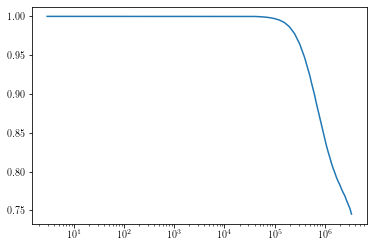

In [28]:
plt.plot(np.power(10, log10MeV), ml._atten)
plt.xscale('log')